## **Linear Regression**

In [ ]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd

## **Load Data**

In [ ]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=ec0d4aad3ed166800cce171a8cc33b82fadeaa0221a8bd939544a79fba352423
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
# the file stored at book's site 
url = 'https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/Ch05/student.csv'
wget.download(url, 'data.csv')

'data.csv'

## **Preparing Data**

In [ ]:
# Load data into pandas
import pandas as pd
df = pd.read_csv('/content/data.csv')
df.head(10)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


In [ ]:
# Extract features and label 
dataset = df.values
X = dataset[:,1]
y = dataset[:,0]

## **Model Definition/Training**

In [ ]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(X, y, epochs=15)

Epoch 1/15
3/3 [==============================] - 0s 2ms/step - loss: 2697665.3750
Epoch 2/15
3/3 [==============================] - 0s 2ms/step - loss: 514827.9531
Epoch 3/15
3/3 [==============================] - 0s 3ms/step - loss: 104913.9316
Epoch 4/15
3/3 [==============================] - 0s 2ms/step - loss: 28756.2549
Epoch 5/15
3/3 [==============================] - 0s 2ms/step - loss: 14844.5134
Epoch 6/15
3/3 [==============================] - 0s 2ms/step - loss: 12184.6501
Epoch 7/15
3/3 [==============================] - 0s 2ms/step - loss: 12378.9497
Epoch 8/15
3/3 [==============================] - 0s 2ms/step - loss: 12651.4150
Epoch 9/15
3/3 [==============================] - 0s 2ms/step - loss: 10184.9924
Epoch 10/15
3/3 [==============================] - 0s 3ms/step - loss: 11074.3896
Epoch 11/15
3/3 [==============================] - 0s 2ms/step - loss: 10898.3818
Epoch 12/15
3/3 [==============================] - 0s 2ms/step - loss: 12493.6548
Epoch 13/15
3/3 [====

## **Predict Unseen Data**

In [ ]:
result = model.predict([5.0])
print("Expected SAT score for GPA 5.0: {:.0f}".format(result[0][0]))
result = model.predict([3.2])
print("Expected SAT score for GPA 3.2: {: .0f}".format(result[0][0]))

Expected SAT score for GPA 5.0: 2684
Expected SAT score for GPA 3.2:  1774


# **Wine Quality Analysis**

In [ ]:
import tensorflow as tf

In [ ]:
# import required packages 
import pandas as pd 
import requests
import io
import matplotlib.pyplot as plt

## **Loading Data**

In [ ]:
dataset_url = '/content/winequality-white.csv'
dataset = pd.read_csv(dataset_url, sep=';')

In [ ]:
# Display last few records
dataset.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


## **Data Preprocessing**

In [ ]:
# Extracting features and labels 
X = dataset.drop('quality', axis=1)
y = dataset['quality']

In [ ]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [ ]:
# Creating training, validation and testing datasets
from sklearn.model_selection import train_test_split 
X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_1, y_train_1, test_size=0.5, random_state=0)

In [ ]:
# scaling data
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
# Here sc_x is used to understand the structure of training dataset
# apply formulas and then transfering the training dataset.
X_train_new = sc_x.fit_transform(X_train)
# Here we don't need to fit it again
X_test_new = sc_x.transform(X_test)
X_val_new  = sc_x.transform(X_val)

## **Checking preprocessing results**

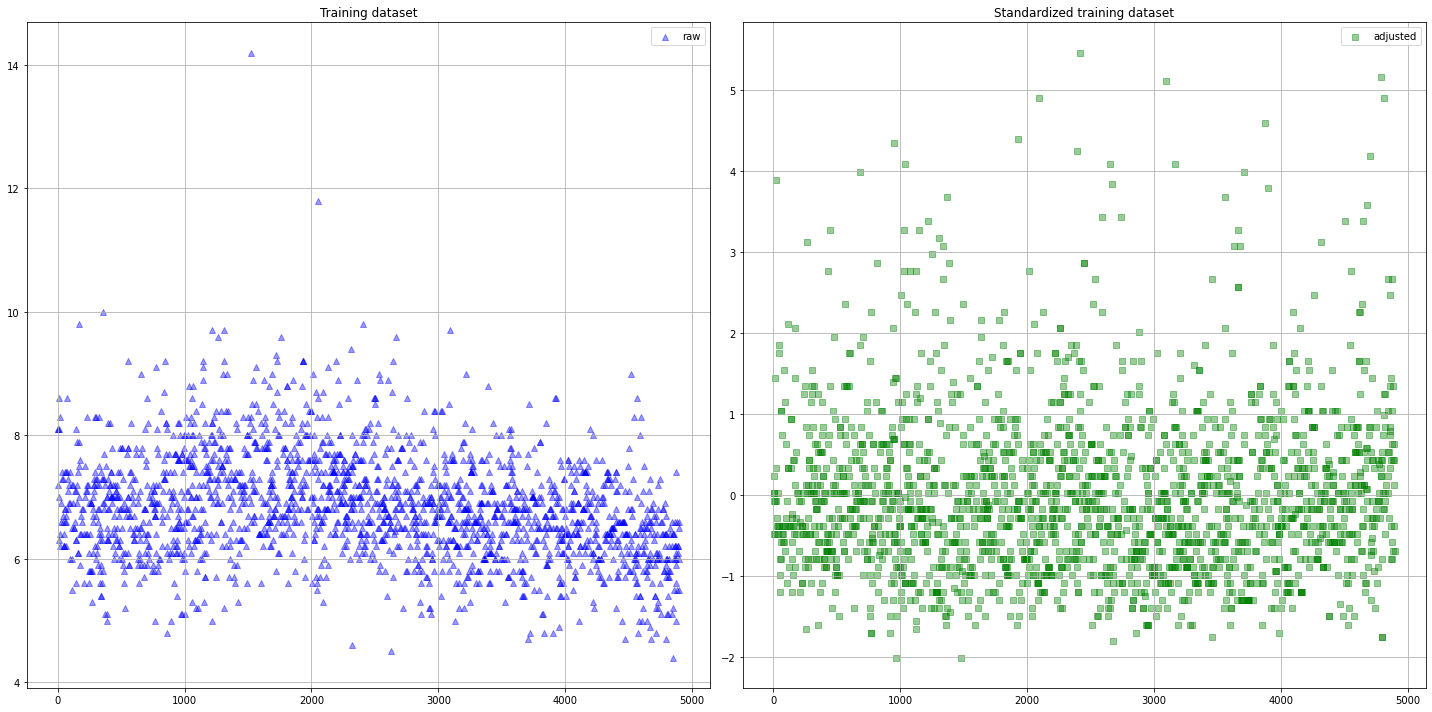

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

ax1.scatter(X_train.index, X_train['fixed acidity'], color='blue', label='raw', alpha=0.4, marker='^')
ax2.scatter(X_train.index, X_train_new[:, 1], color='green', label='adjusted', alpha=0.4, marker='s')


ax1.set_title('Training dataset')
ax2.set_title('Standardized training dataset')

for ax in (ax1, ax2):
  ax.set_label('index')
  ax.set_label('fixed acidity')
  ax.legend(loc='upper right')
  ax.grid()


plt.tight_layout()

plt.show()

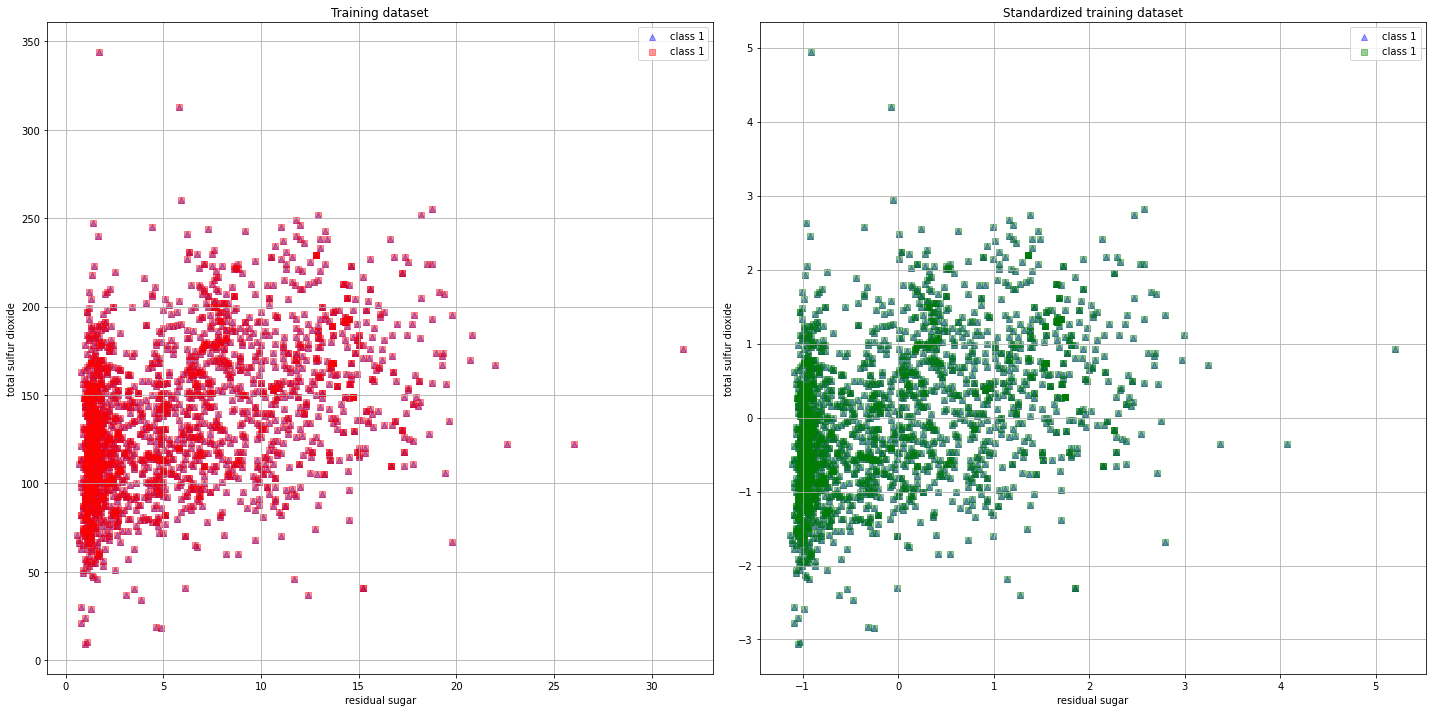

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
  ax1.scatter(X_train['residual sugar'], X_train['total sulfur dioxide'], color=c, label='class %s' % 1, alpha=0.4, marker=m)

for l, c, m in zip(range(0, 2), ('blue', 'green'), ('^', 's')):
  ax2.scatter(X_train_new[:, 3], X_train_new[:, 6], color=c, label='class %s' % 1, alpha=0.4, marker=m)

ax1.set_title('Training dataset')
ax2.set_title('Standardized training dataset')

for ax in (ax1, ax2):
  ax.set_xlabel('residual sugar')
  ax.set_ylabel('total sulfur dioxide')
  ax.legend(loc='upper right')
  ax.grid()

plt.tight_layout()
plt.show()

## **Metrics visualization function**

In [ ]:
import matplotlib.pyplot as plt 
epoch = 30

def plot_learningCurve(history):
  # plot training and validation accuracy values
  epoch_range = range(1, epoch+1)
  # ploting the mae vs epoch of training set 
  plt.plot(epoch_range, history.history['mae'])
  #plotting the val_mae vs epoch of the validation dataset.
  plt.plot(epoch_range, history.history['val_mae'])
  plt.ylim([0, 2])
  plt.title('Model mae')
  plt.ylabel('mae')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()

  print("--------------------------------------------------------")

  # plot trianing and validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.ylim([0, 4])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper right')
  plt.show()


```
# This is formatted as code
```

## **Small Model**

In [ ]:
small_model = tf.keras.Sequential([
                                   tf.keras.layers.Dense(16, activation='relu', input_shape=(11, )),
                                   tf.keras.layers.Dense(1)
])

small_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_small = small_model.fit(X_train_new, y_train, batch_size=32, epochs=30, verbose=0, validation_data=(X_val_new, y_val))

## **Small Model Evaluation Metrics**

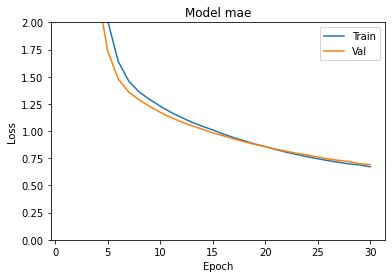

--------------------------------------------------------


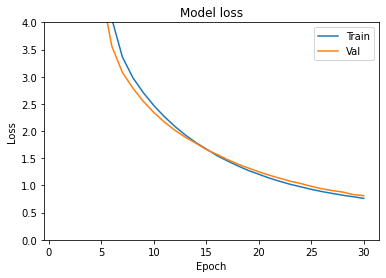

In [ ]:
plot_learningCurve(history_small)

In [ ]:
s_test_loss, s_test_mae = small_model.evaluate(X_test_new, y_test, batch_size=32, verbose=1)
print("small model test_loss: {}".format(s_test_loss))
print("small model test_mae: {}".format(s_test_mae))

23/23 [==============================] - 0s 1ms/step - loss: 1.0375 - mae: 0.7637
small model test_loss: 1.0375480651855469
small model test_mae: 0.7637091875076294


In [ ]:
import numpy as np
unseen_data = np.array([[6.0, 0.28, 0.22, 12.15, 0.048, 42.0, 163.0, 0.99570, 3.20, 0.46, 10.1]])

In [ ]:
y_small = small_model.predict(sc_x.transform(unseen_data))
print("Wine quality on unseen data (small model): ", y_small[0][0])

Wine quality on unseen data (small model):  4.9674544


In [ ]:
y_small

array([[4.9674544]], dtype=float32)

In [ ]:
small_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


## **Medium Model**

In [ ]:
medium_model = tf.keras.Sequential([
                    
                    tf.keras.layers.Dense(64, activation='relu', input_shape=(11, )),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(1)
])

medium_model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history_medium = medium_model.fit(X_train_new, y_train, batch_size=32, epochs=30, verbose=1, validation_data=(X_val_new, y_val))

Epoch 1/30
66/66 [==============================] - 1s 7ms/step - loss: 17.6992 - mae: 3.7308 - val_loss: 2.6540 - val_mae: 1.2175
Epoch 2/30
66/66 [==============================] - 0s 3ms/step - loss: 2.4123 - mae: 1.2159 - val_loss: 1.9915 - val_mae: 1.0584
Epoch 3/30
66/66 [==============================] - 0s 3ms/step - loss: 1.8040 - mae: 1.0529 - val_loss: 1.5889 - val_mae: 0.9517
Epoch 4/30
66/66 [==============================] - 0s 3ms/step - loss: 1.4194 - mae: 0.9221 - val_loss: 1.2740 - val_mae: 0.8558
Epoch 5/30
66/66 [==============================] - 0s 3ms/step - loss: 1.0940 - mae: 0.8090 - val_loss: 1.0141 - val_mae: 0.7649
Epoch 6/30
66/66 [==============================] - 0s 3ms/step - loss: 0.8971 - mae: 0.7484 - val_loss: 0.7573 - val_mae: 0.6697
Epoch 7/30
66/66 [==============================] - 0s 3ms/step - loss: 0.6760 - mae: 0.6371 - val_loss: 0.6703 - val_mae: 0.6315
Epoch 8/30
66/66 [==============================] - 0s 3ms/step - loss: 0.6370 - mae: 0.6

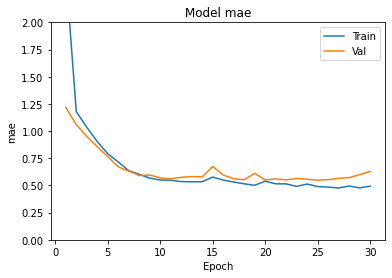

--------------------------------------------------------


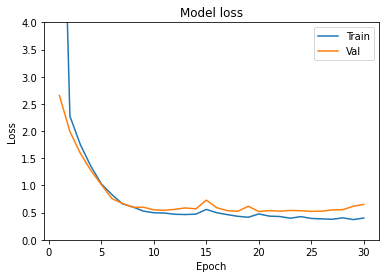

In [ ]:
plot_learningCurve(history_medium)

In [ ]:
m_test_loss, m_test_mae = medium_model.evaluate(X_test_new, y_test, batch_size=32, verbose = 1)
print("medium model test_loss: {}".format(m_test_loss))
print("medium model test_mae: {}".format(m_test_mae))

23/23 [==============================] - 0s 1ms/step - loss: 0.7480 - mae: 0.6780
medium model test_loss: 0.7479946613311768
medium model test_mae: 0.6780319809913635


In [ ]:
y_medium = medium_model.predict(sc_x.transform(unseen_data))
print("Wine quality on unseen data (medium model): ", y_medium[0][0])

Wine quality on unseen data (medium model):  5.8741713


In [ ]:
medium_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                768       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 9,153
Trainable params: 9,153
Non-trainable params: 0
_________________________________________________________________


## **Large Model**

In [ ]:
large_model = tf.keras.Sequential([
                                   
                        tf.keras.layers.Dense(128, activation='relu', input_shape=(11, )),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.Dense(1)
])

large_model.compile(loss = 'mse', optimizer='adam', metrics=['mae'])

history_large = large_model.fit(X_train_new, y_train, batch_size=32, epochs=30, verbose=1, validation_data=(X_val_new, y_val))

Epoch 1/30
66/66 [==============================] - 1s 6ms/step - loss: 15.1763 - mae: 3.2657 - val_loss: 2.4384 - val_mae: 1.1605
Epoch 2/30
66/66 [==============================] - 0s 7ms/step - loss: 2.0397 - mae: 1.1291 - val_loss: 1.4755 - val_mae: 0.9272
Epoch 3/30
66/66 [==============================] - 0s 3ms/step - loss: 1.2742 - mae: 0.8855 - val_loss: 0.9870 - val_mae: 0.7545
Epoch 4/30
66/66 [==============================] - 0s 3ms/step - loss: 0.7574 - mae: 0.6881 - val_loss: 0.9664 - val_mae: 0.7685
Epoch 5/30
66/66 [==============================] - 0s 3ms/step - loss: 0.7971 - mae: 0.7056 - val_loss: 0.7175 - val_mae: 0.6491
Epoch 6/30
66/66 [==============================] - 0s 3ms/step - loss: 0.5281 - mae: 0.5665 - val_loss: 0.5833 - val_mae: 0.5777
Epoch 7/30
66/66 [==============================] - 0s 3ms/step - loss: 0.4905 - mae: 0.5442 - val_loss: 0.7531 - val_mae: 0.6696
Epoch 8/30
66/66 [==============================] - 0s 4ms/step - loss: 0.5168 - mae: 0.5

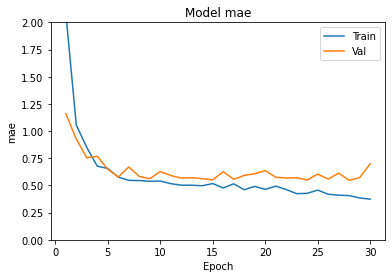

--------------------------------------------------------


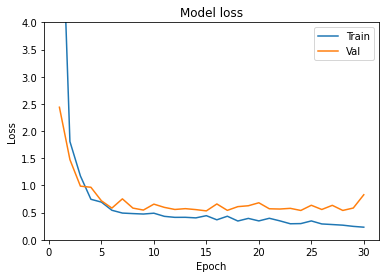

In [ ]:
plot_learningCurve(history_large)

In [ ]:
l_test_loss, l_test_mae = large_model.evaluate(X_test_new, y_test, batch_size=32, verbose=1)
print("large model test_loss: {}".format(l_test_loss))
print("large model test_mae: {}".format(l_test_mae)) 

23/23 [==============================] - 0s 1ms/step - loss: 0.9940 - mae: 0.7505
large model test_loss: 0.9940299391746521
large model test_mae: 0.7504851222038269


In [ ]:
y_large = large_model.predict(sc_x.transform(np.array([[6.0 , 0.28 , 0.22 , 12.15 , 0.048 , 42.0 , 163.0 , 0.99570 , 3.20 , 0.46 , 10.1]])))
print("Wine quality on unseen data (large model): ", y_large[0][0])

Wine quality on unseen data (large model):  5.3547587


In [ ]:
large_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               1536      
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


## **Reducing Overfitting in case of Large Model**

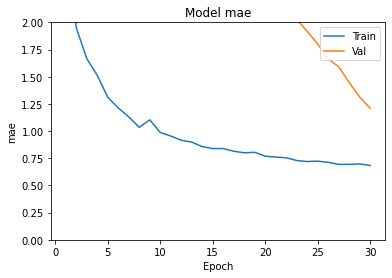

--------------------------------------------------------


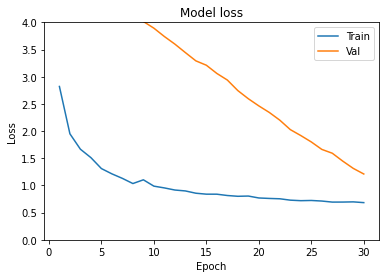

In [ ]:
large_model_overfit = tf.keras.Sequential([
                          
                          tf.keras.layers.Dense(128, activation='relu', input_shape=(11, )),
                          tf.keras.layers.Dropout(0.4),
                          tf.keras.layers.Dense(128, activation='relu'),
                          tf.keras.layers.Dropout(0.3),
                          tf.keras.layers.Dense(128, activation='relu'),
                          tf.keras.layers.Dropout(0.2),
                          tf.keras.layers.Dense(128, activation='relu'),
                          tf.keras.layers.Dense(1),
])

large_model_overfit.compile(loss='mae', optimizer='adam', metrics=['mae'])
history_large_overfit = large_model_overfit.fit(X_train, y_train, batch_size=32, epochs=30, verbose =0, validation_data=(X_val_new, y_val))
plot_learningCurve(history_large_overfit)

## **Training Optimization in case of Small Model**

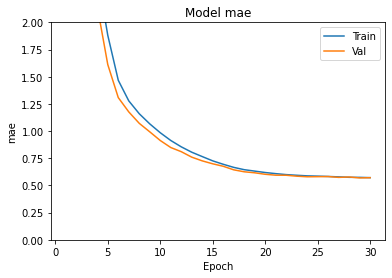

--------------------------------------------------------


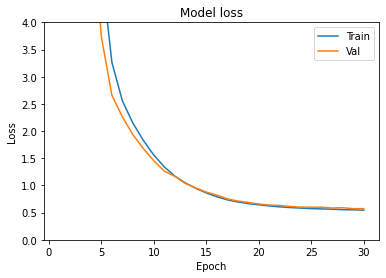

In [ ]:
model_small = tf.keras.Sequential([
                                   
              tf.keras.layers.Dense(16, activation='relu', input_shape=(11, )),
              tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.RMSprop(0.001)
model_small.compile(loss = 'mse', optimizer=optimizer, metrics=['mae'])
history_small_overfit = model_small.fit(X_train_new, y_train, batch_size=32, epochs=30, verbose=0, validation_data=(X_val_new, y_val))
plot_learningCurve(history_small_overfit)